In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# Load the dataset
df = pd.read_csv("Salary_Data.csv")
df


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
# Print the first five rows of the dataframe
print(df.head())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [4]:
# Check the number of rows and columns
print("Number of rows and columns:", df.shape)

# Check for missing values
print("Missing values:", df.isnull().sum())

# Check the data types of each column
print("Data types:\n", df.dtypes)



Number of rows and columns: (30, 2)
Missing values: YearsExperience    0
Salary             0
dtype: int64
Data types:
 YearsExperience    float64
Salary             float64
dtype: object


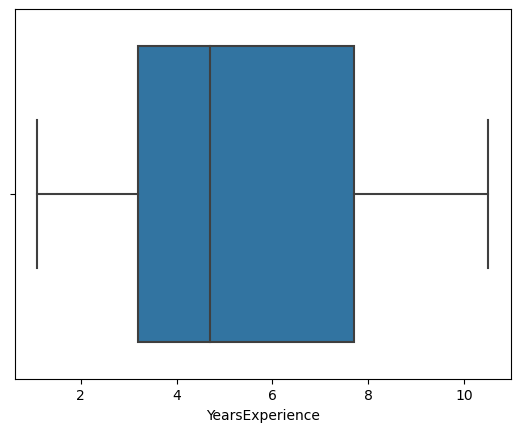

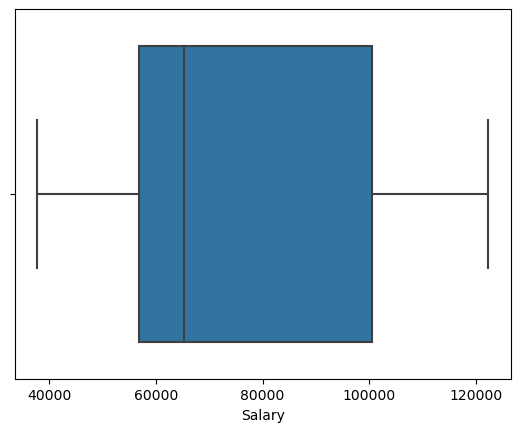

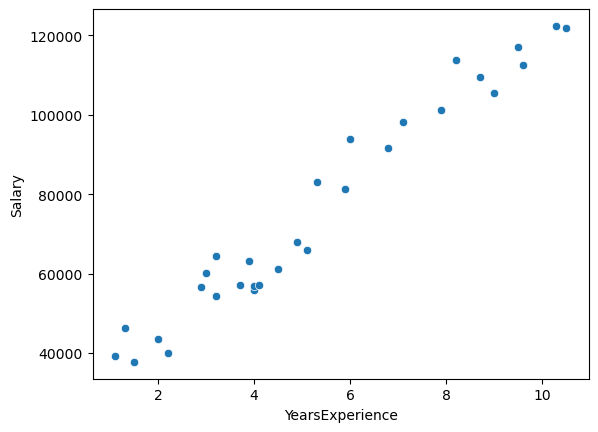

In [5]:
# Check for outliers
sns.boxplot(x="YearsExperience", data=df)
plt.show()

sns.boxplot(x="Salary", data=df)
plt.show()

# Check the correlation between the two variables
sns.scatterplot(x="YearsExperience", y="Salary", data=df)
plt.show()

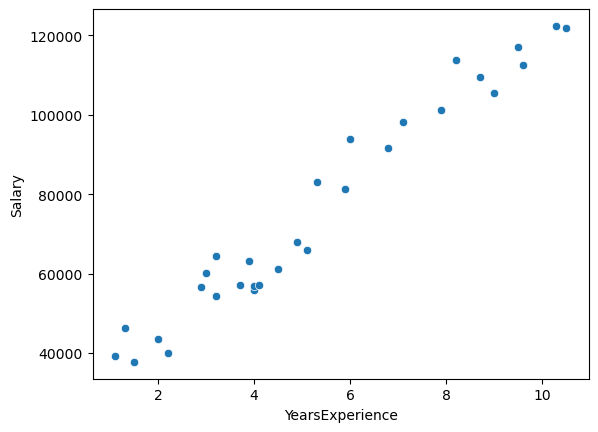

In [6]:
# Check the correlation between the two variables
sns.scatterplot(x="YearsExperience", y="Salary", data=df)
plt.show()

In [7]:
# Apply a logarithmic transformation to 'YearsExperience' feature column
df['YearsExperience'] = np.log(df['YearsExperience'])


In [8]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['YearsExperience'], df['Salary'], test_size=0.2, random_state=0)


In [9]:
# Reshape the data
X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [10]:
# Create a linear regression object and fit it to the training data
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [11]:

# Print the intercept and coefficients
print("Intercept:", reg.intercept_[0])
print("Coefficient:", reg.coef_[0][0])

Intercept: 17656.7010400551
Coefficient: 38310.90138738539


In [12]:
# Make predictions on the testing data
y_pred = reg.predict(X_test)

In [13]:
# Calculate the R-squared score
print("R-squared score:", r2_score(y_test, y_pred))

R-squared score: 0.8824412113358869


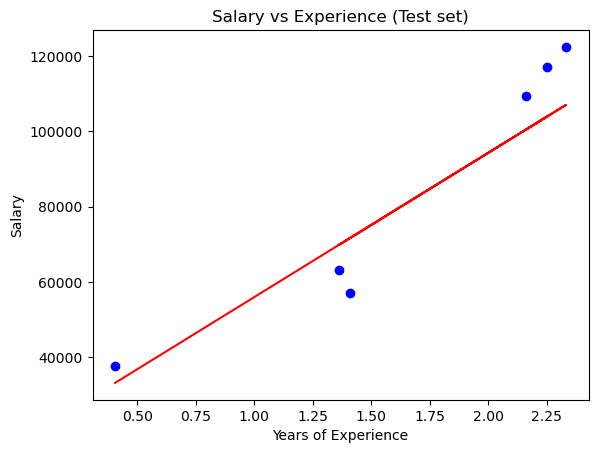

In [14]:
# Visualize the linear regression line and the testing data
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [15]:
# Predict the salary for someone with 7 years of experience
years = [[7]]
salary = reg.predict(years)[0][0]
print("Salary for someone with 7 years of experience:", round(salary))

Salary for someone with 7 years of experience: 285833
